In [1]:
import pandas as pd
import numpy as np
import py4cytoscape as p4c

In [2]:
age_df = pd.read_csv('../data/sheep_age.csv')

In [3]:
edge_df = pd.read_csv('../data/sheep_edges.csv')

In [4]:
age_df['id'] = age_df['id'].astype(str)
edge_df['source'] = edge_df['source'].astype(str)
edge_df['target'] = edge_df['target'].astype(str)

In [5]:
def assign_age_group(age):
    if age < 5:
        return 'Young'
    elif age < 9:
        return 'Middle-Aged'
    else:
        return 'Old'

age_df['Age_Group'] = age_df['age'].apply(assign_age_group)

p4c.cytoscape_ping()
p4c.delete_all_networks()
network_suid = p4c.create_network_from_data_frames(nodes=age_df, edges=edge_df, title='Sheep Dominance Network')
p4c.layout_network('degree-circle')

style_name = 'Directed'
group_to_color = {
    'table_column': 'Age_Group',
    'mapping_type': 'discrete',
    'table_column_values': ['Young','Middle-Aged','Old'],
    'colors':['#00FF00', '#0000FF', '#FF0000']
}
p4c.set_node_color_mapping(**group_to_color, style_name=style_name)
p4c.set_visual_style(style_name)

You are connected to Cytoscape!
Applying default style...
Applying preferred layout


{'message': 'Visual Style applied.'}

In [6]:
#To get InDegree and OutDegree
p4c.analyze_network(directed = True)

{'networkTitle': 'Sheep Dominance Network (directed)',
 'nodeCount': '28',
 'edgeCount': '250',
 'avNeighbors': '16.785714285714285',
 'diameter': '5',
 'radius': '1',
 'avSpl': '1.9539026834428237',
 'cc': '0.3852322174102288',
 'density': '0.3306878306878307',
 'ncc': '1',
 'mnp': '15',
 'nsl': '0',
 'time': '0.006'}

In [8]:
p4c.set_node_fill_opacity_bypass(p4c.select_all_nodes(), 120)
p4c.set_node_font_size_bypass(p4c.select_all_nodes(), 40)
p4c.set_node_label_color_bypass(p4c.select_all_nodes(), 'black')
p4c.set_node_border_width_bypass(p4c.select_all_nodes(), 10)
p4c.set_node_shape_bypass(p4c.select_all_nodes(), 'ELLIPSE')
p4c.gen_node_size_map('Outdegree', p4c.scheme_c_number_continuous(50, 150), mapping_type = 'c')

{'table_column': 'Outdegree',
 'table_column_values': [0.0, 9.0, 18.0],
 'sizes': [50, 100.0, 150],
 'mapping_type': 'c',
 'default_size': None,
 'style_name': None,
 'network': None,
 'base_url': 'http://127.0.0.1:1234/v1'}

In [9]:
#After this - on Cytoscape - the Layout was changed to 'attribute-circle' using attribute 'Outdegree'
p4c.export_image('../output/Wins',type='PNG')

{'file': 'C:\\Users\\varun\\DataViz\\Exercise-4-vaaruni-desai\\output\\Wins.png'}

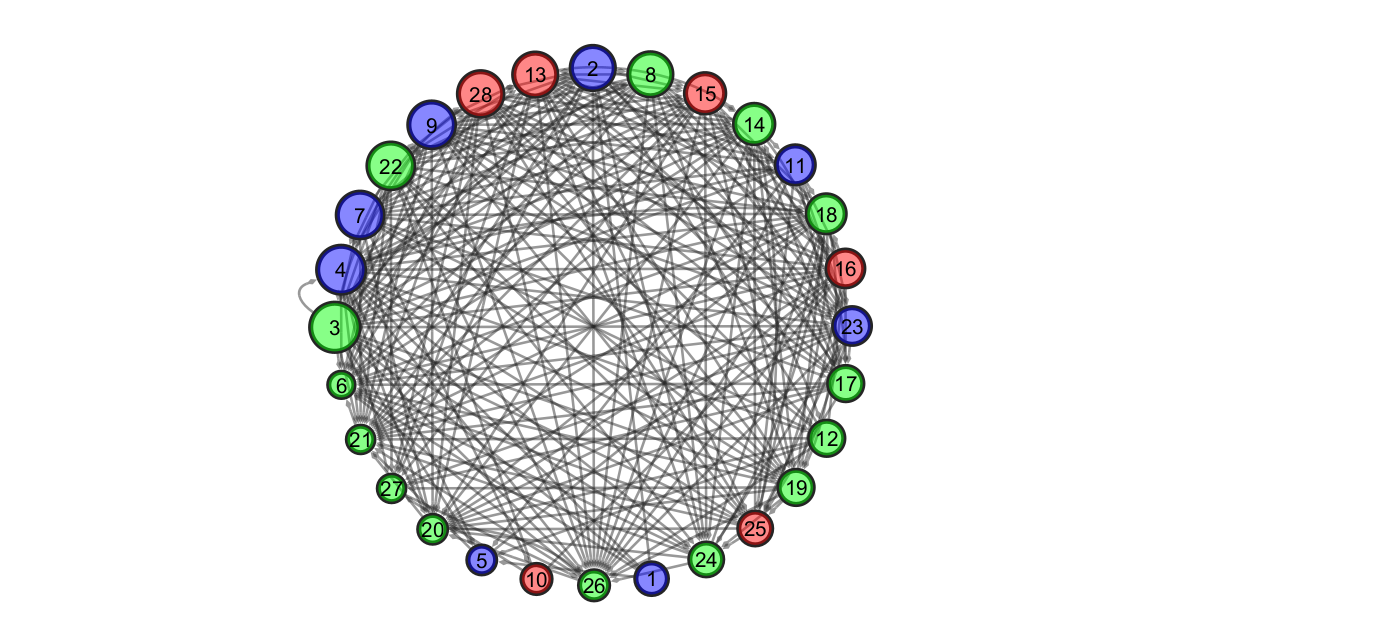

In [10]:
from IPython.display import Image
Image(filename='../output/Wins.png')

In [11]:
p4c.gen_node_size_map('Indegree', p4c.scheme_c_number_continuous(50, 150), mapping_type = 'c')

{'table_column': 'Indegree',
 'table_column_values': [0.0, 10.5, 21.0],
 'sizes': [50, 100.0, 150],
 'mapping_type': 'c',
 'default_size': None,
 'style_name': None,
 'network': None,
 'base_url': 'http://127.0.0.1:1234/v1'}

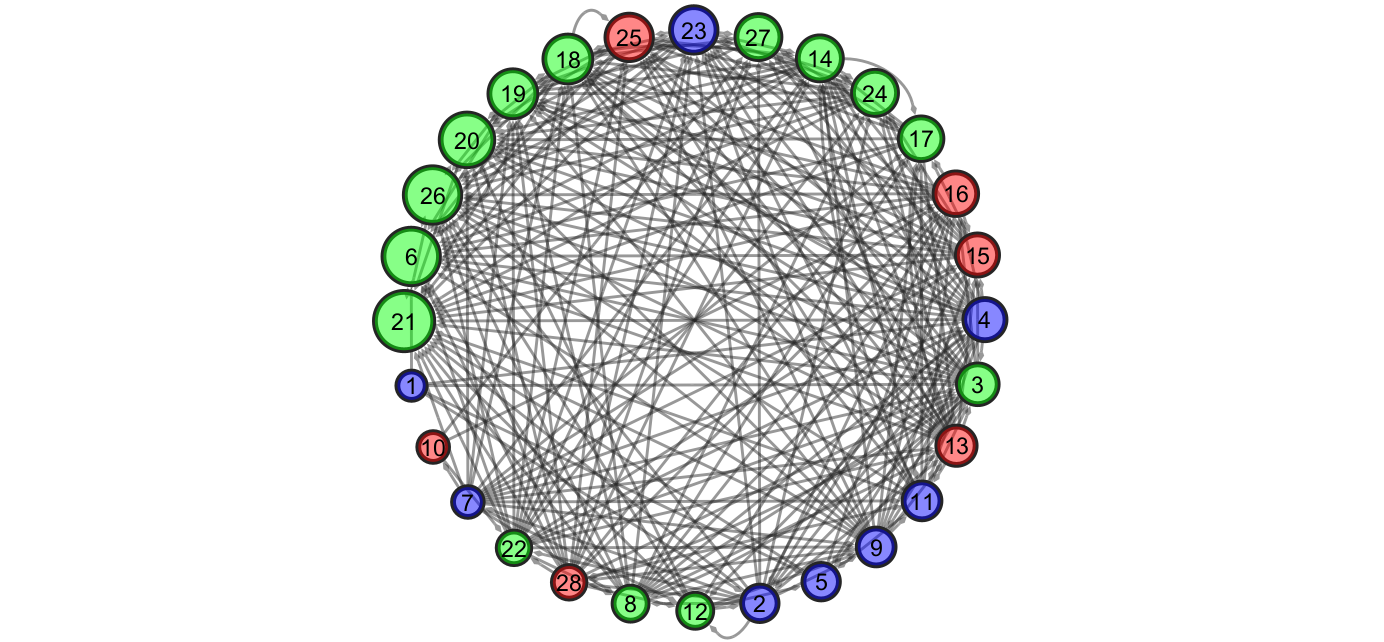

In [12]:
#After this - on Cytoscape - the Layout was changed to 'attribute-circle' using attribute 'Indegree'
p4c.export_image('../output/Loses',type='PNG')
from IPython.display import Image
Image(filename='../output/Loses.png')